In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 33039.59it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407961/407961 [00:09<00:00, 41023.55it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37421.65it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


In [7]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=30, seed=42))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)

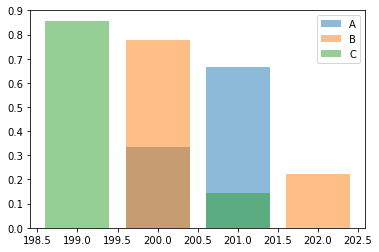

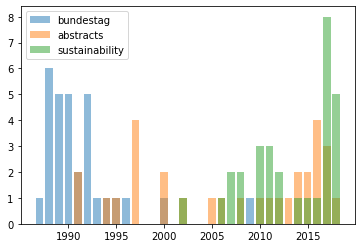

In [8]:
from plot_utils import multi_bar_histogram
multi_bar_histogram([[200, 201],[200, 202],[199, 201]], [[5,10],[7,2],[12,2]],['A', 'B','C'])
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [9]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(1, seed=42) for corpus in filtered_corpora]

In [10]:
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


In [11]:
import re
def remove_punctuation(corpus: Corpus):
    for d in corpus.get_documents():
        res = re.sub(r'[^a-zA-ZäöüÖÄÜß\-\s\.!\?]', '', d.text)
        res = re.sub(r' +', ' ', res)
        d.text = res
    

remove_punctuation(sampled_corpora[0])

In [12]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(kwt, restrict_per_document=10)

# sampled_corpora[2].get_documents()[0].keywords

found keyword 'hochgradig vernetzen chemische produktionsprozesse' in cache, taking this one
de 	 highly crosslinked chemical production processes 			 hochgradig vernetzen chemische produktionsprozesse
de 	 As to use chemical product 			 einsatz chemisch produkt anlangt
de 	 never known measure affecting 			 nie gekannt maß beeinflussen
de 	 today's view neither necessary 			 heutig sicht weder nötigen
de 	 industry read typical sentence 			 industrie typisch satz vorlesen
de 	 federal republic produce two firma 			 bundesrepublik produzieren zwei firma
de 	 environmental problems even today often 			 umweltproblemen ja heute häufig
de 	 mr schmid farm address - 			 herr schmidbauer ansprechen –
de 	 finance product alternatively 			 finanzierung alternativ produkt
de 	 chemical coupling products arise 			 chemische koppelprodukte entstehen
found keyword 'potent hydrofluorocarbon greenhouse gas' in cache, taking this one
en 	 potent hydrofluorocarbon greenhouse gas 			 potent Fluorkohl

In [13]:
for corpus in sampled_corpora[:]:
    print(corpus.translate_keywords(kwt, restrict_per_document=1))

# sampled_corpora[2].get_documents()[0].keywords

found keyword 'hochgradig vernetzen chemische produktionsprozesse' in cache, taking this one
de 	 highly crosslinked chemical production processes 			 hochgradig vernetzen chemische produktionsprozesse
[de(highly crosslinked chemical production processes | hochgradig vernetzen chemische produktionsprozesse)]
found keyword 'potent hydrofluorocarbon greenhouse gas' in cache, taking this one
en 	 potent hydrofluorocarbon greenhouse gas 			 potent Fluorkohlenwasserstoff- Treibhausgas
[en(potent hydrofluorocarbon greenhouse gas | potent Fluorkohlenwasserstoff- Treibhausgas)]
found keyword 'therefore require little maintenance' in cache, taking this one
en 	 therefore require little maintenance 			 deshalb benötigen wenig Wartung
[en(therefore require little maintenance | deshalb benötigen wenig Wartung)]


In [14]:
sampled_corpora[0].get_documents()[0].keywords

[de(highly crosslinked chemical production processes | hochgradig vernetzen chemische produktionsprozesse),
 de(As to use chemical product | einsatz chemisch produkt anlangt),
 de(never known measure affecting | nie gekannt maß beeinflussen),
 de(today's view neither necessary | heutig sicht weder nötigen),
 de(industry read typical sentence | industrie typisch satz vorlesen),
 de(federal republic produce two firma | bundesrepublik produzieren zwei firma),
 de(environmental problems even today often | umweltproblemen ja heute häufig),
 de(mr schmid farm address - | herr schmidbauer ansprechen –),
 de(finance product alternatively | finanzierung alternativ produkt),
 de(chemical coupling products arise | chemische koppelprodukte entstehen),
 de(- | ökonomisch günstig verwerten),
 de(- | thema ozon zeigen),
 de(- | konsul van lierde),
 de(- | innerhalb kurz zeit),
 de(- | erwartend klimakatastrophe stehen),
 de(- | aktivität besonders seit),
 de(- | how entgegenkommen müssen),
 de(- | se

In [14]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

({}, {})

In [15]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

dict_keys([])
Frau Präsidentin ! Meine Dame und Herr ! der Problem vor der ich mit der zu erwartend Klimakatastrop ...
  keywords:
    - "(- | hochgradig vernetzen chemische produktionsprozesse)"
    - "(- | einsatz chemisch produkt anlangt)"
    - "(- | nie kennen messen beeinflussen)"
    - "(- | heutig sicht weder nötig)"
    - "(- | industrie typisch satz vorlesen)"
    - "(- | bundesrepublik produzieren zwei firma)"
    - "(- | umweltproblemen ja heute häufig)"
    - "(- | herr schmidbauer ansprechen –)"
    - "(- | finanzierung alternativ produkt)"
    - "(- | chemische koppelprodukte entstehen)"
    - "(- | ökonomisch günstig verwerten)"
    - "(- | thema ozon zeigen)"
    - "(- | konsul van lierde)"
    - "(- | innerhalb kurz zeit)"
    - "(- | erwarten klimakatastrophe stehen)"
    - "(- | aktivität besonders seit)"
    - "(- | how entgegenkommen müssen)"
    - "(- | seit 15 jahr)"
    - "(- | interessieren industrie wehtun)"
    - "(- | falsch richtung bewegen)"
    - "(- | e

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))